#### 환경설정

In [1]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

### 과제 1 - 의사 결정 나무

##### 데이터 전처리

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/Concrete.csv", encoding = "euc-kr")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df_raw[df_raw.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [5]:
# 중복 제거
df_raw = df_raw.drop_duplicates()

In [6]:
# 종속변수에는 strength, 독립변수에는 나머지 변수들을 넣어줌
df_raw_y = df_raw['strength']
df_raw_x = df_raw.drop("strength", axis = 1, inplace = False)

In [7]:
# 훈련 데이터는 60%, 테스트 데이터 40%로 분리
df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(df_raw_x , df_raw_y ,test_size = 0.4 , random_state = 112)
                                                                  
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size :(402, 8)
test data Y size :(402,)


##### 모델 생성

In [74]:
# 기본옵션으로 모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state = 112)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.782


- 기본 옵션으로 만든 모델의 설명력을 보았을때 나쁘지 않은 것을 확인할 수 있으나, <br> 파라미터 조정을 통해 더 좋은 모델을 만들 수도 있으니 조정을 새로운 모델을 만들어 보도록 한다.

In [75]:
# 옵션 확인
tree_uncustomized

DecisionTreeRegressor(random_state=112)

###### 잎사귀 노드의 최소자료 수 파라미터 설정

- min_samples_leaf 가 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. <br> train과 test score 차이를 비교했을 때 값이 차이가 적게나며, 너무 작지도 크지도 않은 최소자료수인 10을 채택한다.

In [76]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 112
                                ,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [77]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.782
1,2,0.975,0.805
2,3,0.958,0.817
3,4,0.938,0.804
4,5,0.920,0.816
5,6,0.903,0.818
6,7,0.893,0.828
7,8,0.876,0.820
8,9,0.862,0.819
9,10,0.850,0.807


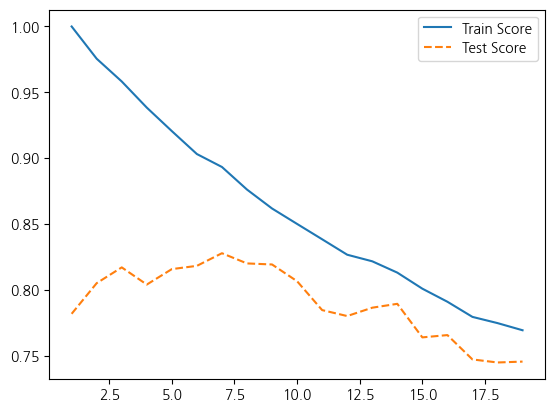

In [78]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

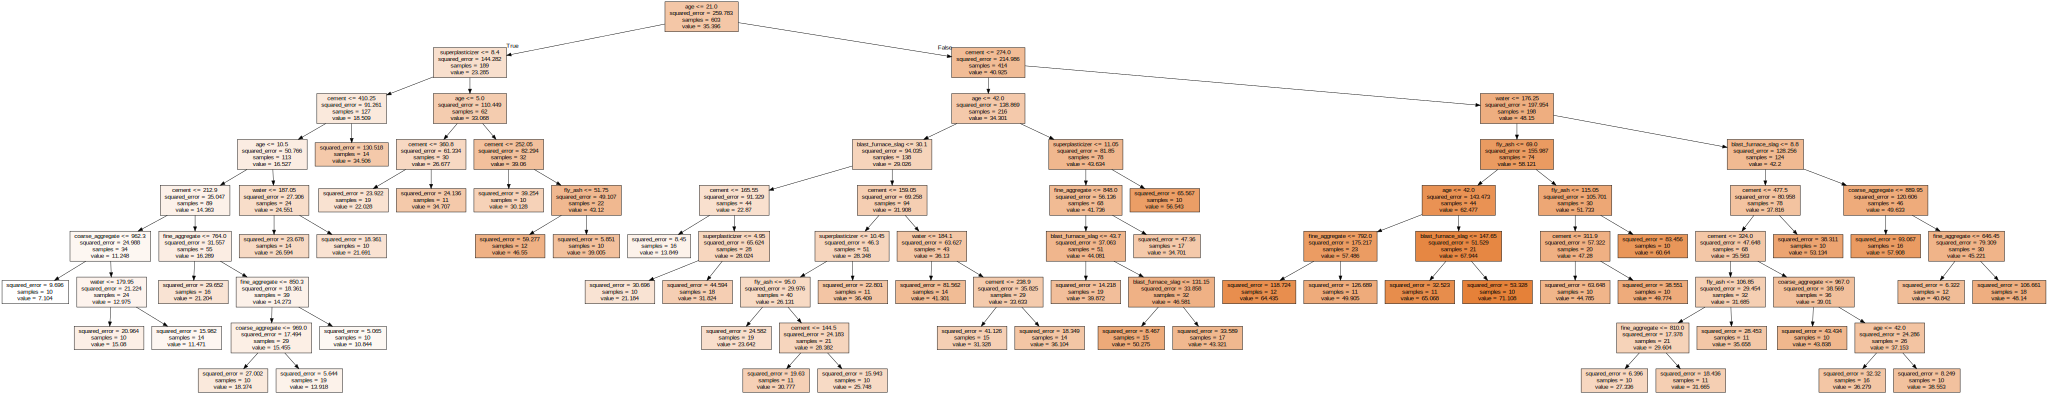

In [79]:
# min_samples_leaf을 10으로 설정하여, 의사결정나무를 그려봄
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor (random_state = 112, min_samples_leaf = 10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### split 노드의 최소자료 수 파라미터 설정

- min_samples_split이 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. <br> train과 test score 차이를 비교했을 때, 모든 최소자료수에서 값이 동일한 것을 확인할 수 있다. 그래서 min_samples_leaf의 두 배인 20으로 설정하였다.

In [14]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split :
    tree_graph = DecisionTreeRegressor (random_state = 112, min_samples_leaf = 10
                                       , min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.769,0.746
1,6,0.769,0.746
2,8,0.769,0.746
3,10,0.769,0.746
4,12,0.769,0.746
5,14,0.769,0.746
6,16,0.769,0.746
7,18,0.769,0.746
8,20,0.769,0.746
9,22,0.769,0.746


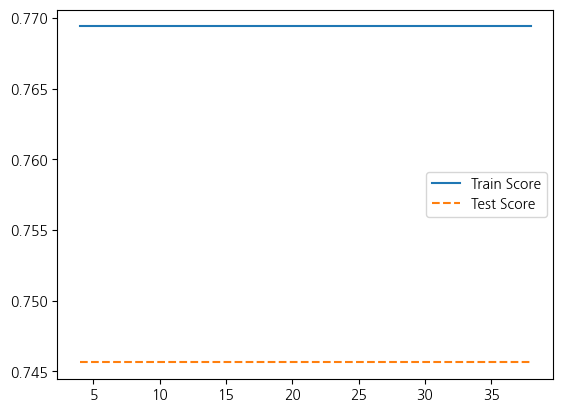

In [15]:
df_score_split.round(3)
plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = "--", label = 'Test Score')
plt.legend()

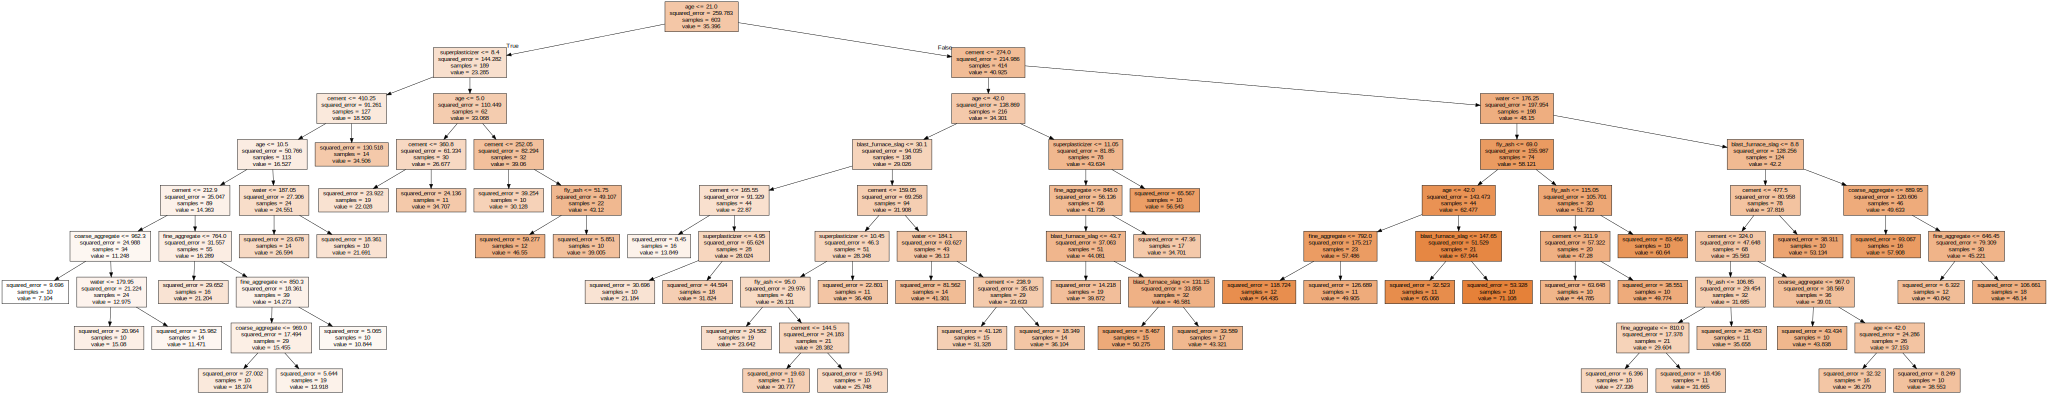

In [17]:
tree_graph = DecisionTreeRegressor(random_state =112, min_samples_leaf=10, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
                feature_names = v_feature_name, impurity = True , filled = True)
with open("tree_split.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### 최대 깊이 파라미터 설정

- max_depth 가 커지면 모델의 설명력은 증가하지만, 과대적합될 우려가 있다. <br> train과 test score 차이를 비교했을 때, 모든 수치가 동일한 것을 확인할 수 있었다. 최대 깊이를 1 또는 2로 할 경우 모델의 설명력이 떨어질 수 있기 때문에, 적당한 숫자인 3으로 채택하였다.



In [18]:
## 뎁스의 모델 설명력확인
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree_graph = DecisionTreeRegressor (random_state = 112, min_samples_leaf = 10 , min_samples_split = 20 
                                       ,max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

### 뎁스가 너무 깊으면 과대적합이 나오기 때문데, 임의로 적당하다고 판단하는 3 으로 설정하고 돌림

,Depth,TrainScore,TestScore
0,1,0.769,0.746
1,2,0.769,0.746
2,3,0.769,0.746
3,4,0.769,0.746
4,5,0.769,0.746
5,6,0.769,0.746
6,7,0.769,0.746
7,8,0.769,0.746
8,9,0.769,0.746
9,10,0.769,0.746


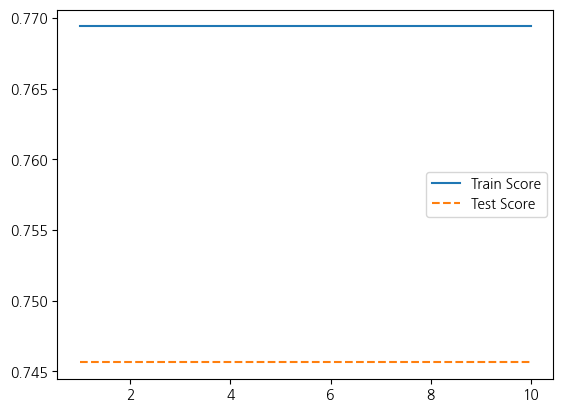

In [19]:
df_score_split.round(3)
plt.plot(para_depth, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = "--", label = 'Test Score')
plt.legend()

#### 최종 모델 선정

- 최종적으로 잎사귀 노드의 최소자료수는 10, 스플릿 노드의 최소자료수는 20, 최대 깊이는 3으로 파라미터를 설정하여 모델을 만들었다. 

In [90]:
# 뎁스 3으로 해줌
tree_final = DecisionTreeRegressor (min_samples_leaf = 10, min_samples_split = 20, max_depth = 3 , random_state = 112 )
tree_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set:0.624
Score on test set:0.632


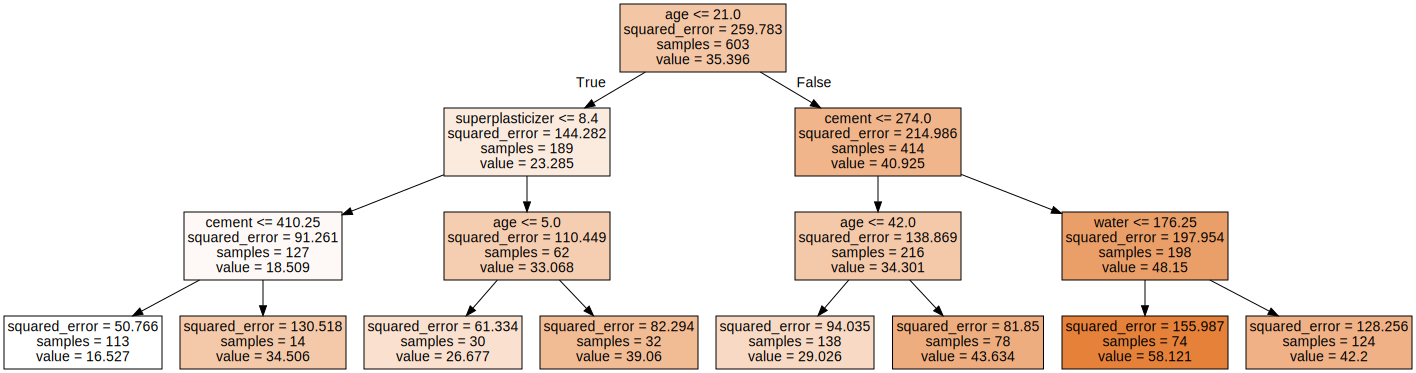

In [85]:
# 최종 모델 시각화
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### 설명변수의 중요도 

- 중요 설명변수로 age, cement, water, superplasticizer 순서대로 영향이 크다고 해석할 수 있다.

In [86]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.546
0,cement,0.244
3,water,0.120
4,superplasticizer,0.090
1,blast_furnace_slag,0.000
2,fly_ash,0.000
5,coarse_aggregate,0.000
6,fine_aggregate,0.000


Text(0, 0.5, '변수')

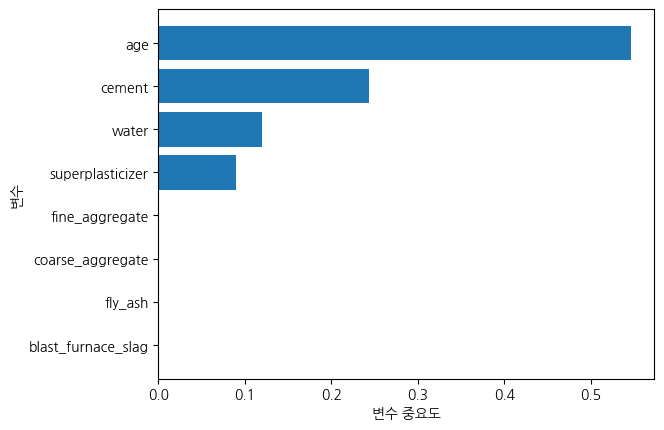

In [87]:
# 설명변수 중요도
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

##### predict method를 이용한 예측값을 구하기

- 실제값이 31.97 이지만 예측값이 42.19975806으로 실제값과 차이가 많이 나는 것을 확인할 수 있다.

In [23]:
# 전체 예측값
print(tree_final.predict(df_test_x))
print("-------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()

print("---Test y data---")
print(df_test_y.iloc[0])
print()

print("---predicted data---")
print(tree_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[42.19975806 42.19975806 16.52707965 42.19975806 29.02601449 29.02601449
 39.0603125  16.52707965 16.52707965 26.677      29.02601449 16.52707965
 42.19975806 29.02601449 39.0603125  16.52707965 43.63435897 42.19975806
 16.52707965 42.19975806 43.63435897 58.12148649 58.12148649 29.02601449
 43.63435897 16.52707965 42.19975806 43.63435897 34.50571429 43.63435897
 42.19975806 29.02601449 16.52707965 58.12148649 42.19975806 43.63435897
 34.50571429 29.02601449 29.02601449 58.12148649 58.12148649 58.12148649
 58.12148649 26.677      42.19975806 16.52707965 43.63435897 58.12148649
 26.677      58.12148649 42.19975806 29.02601449 29.02601449 16.52707965
 16.52707965 42.19975806 29.02601449 42.19975806 42.19975806 16.52707965
 42.19975806 43.63435897 29.02601449 26.677      42.19975806 39.0603125
 58.12148649 58.12148649 42.19975806 16.52707965 43.63435897 58.12148649
 58.12148649 43.63435897 42.19975806 58.12148649 16.52707965 58.12148649
 16.52707965 43.63435897 29.02601449 58.12148649 42.

### 과제 2 - RandomForest

##### 데이터 전처리

In [24]:
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/Concrete.csv", encoding = "euc-kr")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
# 중복 제거
df_raw = df_raw.drop_duplicates()

In [26]:
# 종속변수에는 strength, 독립변수에는 나머지 변수들을 넣어줌
df_raw_y = df_raw['strength']
df_raw_x = df_raw.drop("strength", axis = 1, inplace = False)

In [27]:
# 훈련 데이터는 60%, 테스트 데이터 40%로 분리
df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(df_raw_x , df_raw_y ,test_size = 0.4 , random_state = 112)
                                                                  
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size :(402, 8)
test data Y size :(402,)


##### 모델생성

In [28]:
rf_uncustomized = RandomForestRegressor(random_state = 112)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.984
Score on test set: 0.907


- 기본 옵션으로 만든 모델의 설명력을 보았을때 나쁘지 않은 것을 확인할 수 있으나,파라미터 조정을 통해 더 좋은 모델을 만들 수도 있으니 조정을 새로운 모델을 만들어 보도록 한다.

In [29]:
rf_uncustomized

RandomForestRegressor(random_state=112)

##### 트리 수 파라미터 설정

- tree수가 너무 많으면 과대적합 되고, 반대로 너무 적으면 모델 설명력이 떨어진다. train과 test score 차이를 비교했을 때 값이 차이가 적게나고, test score 적절히 높은 값인 80을 선택했다.

In [30]:
# n_estimators 파라미터 설정
# 트리 수 변경에 따른 모델 성능

train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 112)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [31]:
# 트리 수 80으로 선택
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.978,0.902
1,20,0.982,0.907
2,30,0.981,0.909
3,40,0.982,0.907
4,50,0.982,0.905
5,60,0.982,0.906
6,70,0.983,0.906
7,80,0.983,0.906
8,90,0.983,0.907
9,100,0.984,0.907


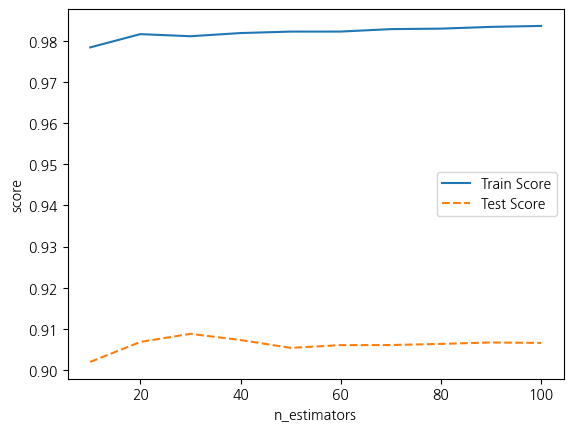

In [32]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

##### 잎사귀 노드의 최소자료 수 파라미터 설정

- min_samples_leaf 가 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. train과 test score 차이를 비교했을 때 값이 차이가 적게나며, test score 값이 너무 작지도 않은 최소자료수인 7을 채택한다.


In [33]:
# v_min_samples_leaf 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 112, n_estimators = 80, 
                                min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [34]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.983,0.906
1,2,0.970,0.902
2,3,0.955,0.896
3,4,0.939,0.887
4,5,0.924,0.879
5,6,0.913,0.872
6,7,0.901,0.867
7,8,0.890,0.863
8,9,0.881,0.856
9,10,0.870,0.850


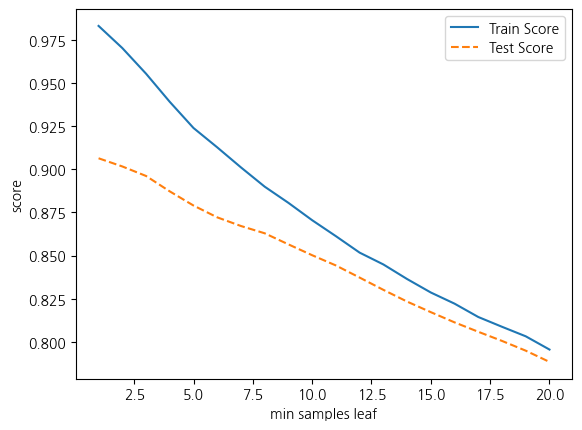

In [35]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

##### split 노드의 최소자료 수 파라미터 설정

- min_samples_split이 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. train과 test score의 경향성을 보았을 때 14에서 급격히 감소하는 것을 볼 수 있고, min_samples_leaf의 두 배 이상이기 때문에 14로 채택했다.

In [36]:
# v_min_samples_split 스플릿 노드의 최소자료수 변경에 따른 모델 성능
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor (random_state = 112, n_estimators = 100, 
                                min_samples_leaf = 6, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.913,0.873
1,6,0.913,0.873
2,8,0.913,0.873
3,10,0.913,0.873
4,12,0.913,0.873
5,14,0.907,0.870
6,16,0.901,0.866
7,18,0.894,0.863
8,20,0.888,0.859
9,22,0.882,0.855


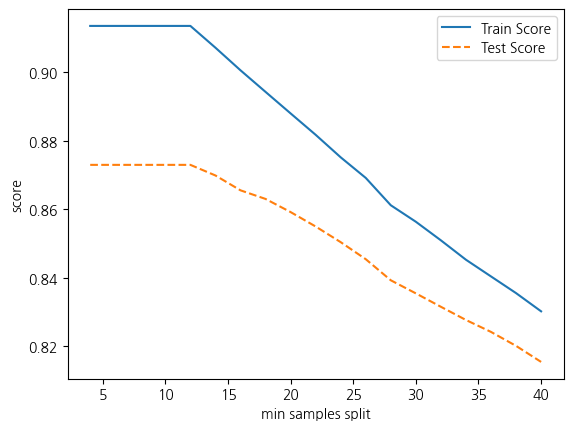

In [37]:
plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

##### 최대 깊이 파라미터 설정

- max_depth 가 커지면 모델의 설명력은 증가하지만, 과대적합될 우려가 있다. <br> train과 test score 차이를 비교했을 때, 차이가 크지 않는 7로 채택하였다.

In [38]:
# 뎁스 최소자료수 설정
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestRegressor (random_state = 112, n_estimators =80, 
                                min_samples_leaf = 7, min_samples_split=14 , 
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [39]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.309,0.297
1,2,0.574,0.575
2,3,0.717,0.718
3,4,0.802,0.792
4,5,0.858,0.838
5,6,0.885,0.856
6,7,0.896,0.864
7,8,0.900,0.867
8,9,0.901,0.867
9,10,0.901,0.867


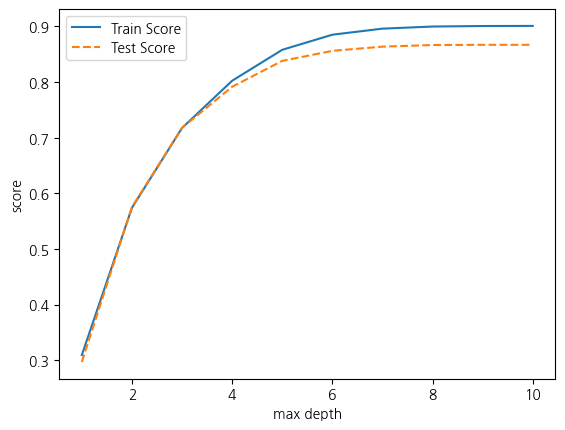

In [40]:
plt.plot(para_depth, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

##### 최종 모델 선정

- 최종적으로 잎사귀 노드의 트리 개수는 80, 최소자료수는 7, 스플릿 노드의 최소자료수는 14, 최대 깊이는 7으로 파라미터를 설정하여 모델을 만들었다.



In [41]:
# 최종 모델

rf_final = RandomForestRegressor (random_state = 112, n_estimators = 80, 
                                min_samples_leaf = 7, min_samples_split=14 , 
                               max_depth = 7)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set:0.896
Score on test set:0.864


In [42]:
rf_final

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=14,
                      n_estimators=80, random_state=112)

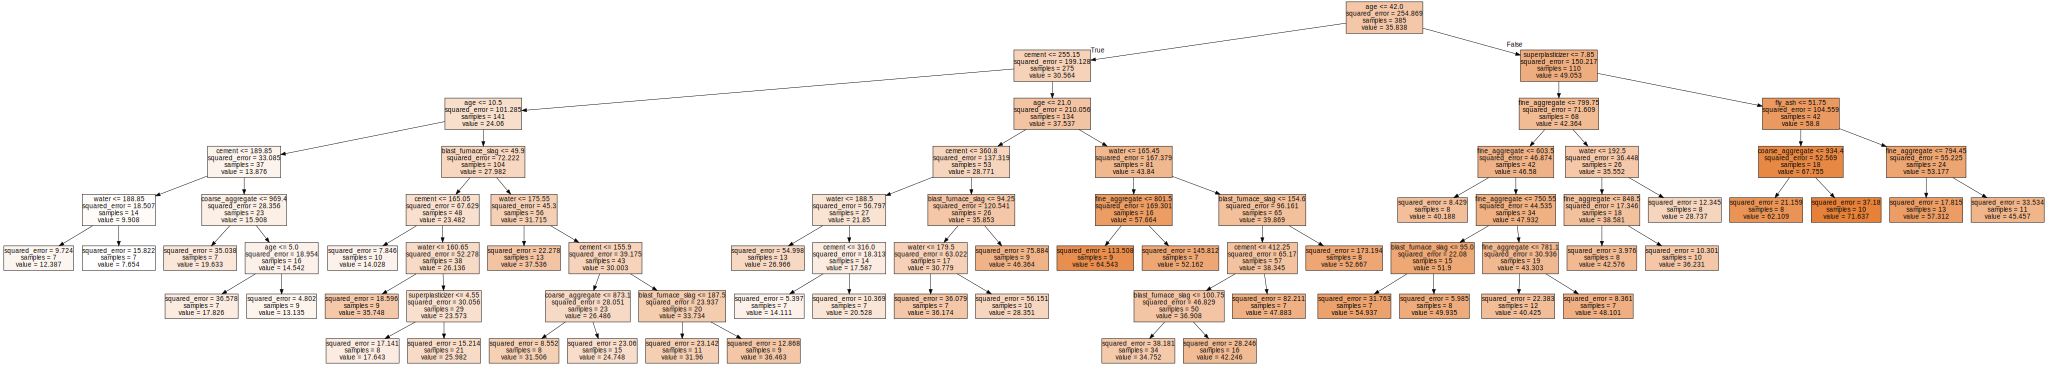

In [43]:
# 최종 모델 시각화 (0번 트리)

v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_0.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

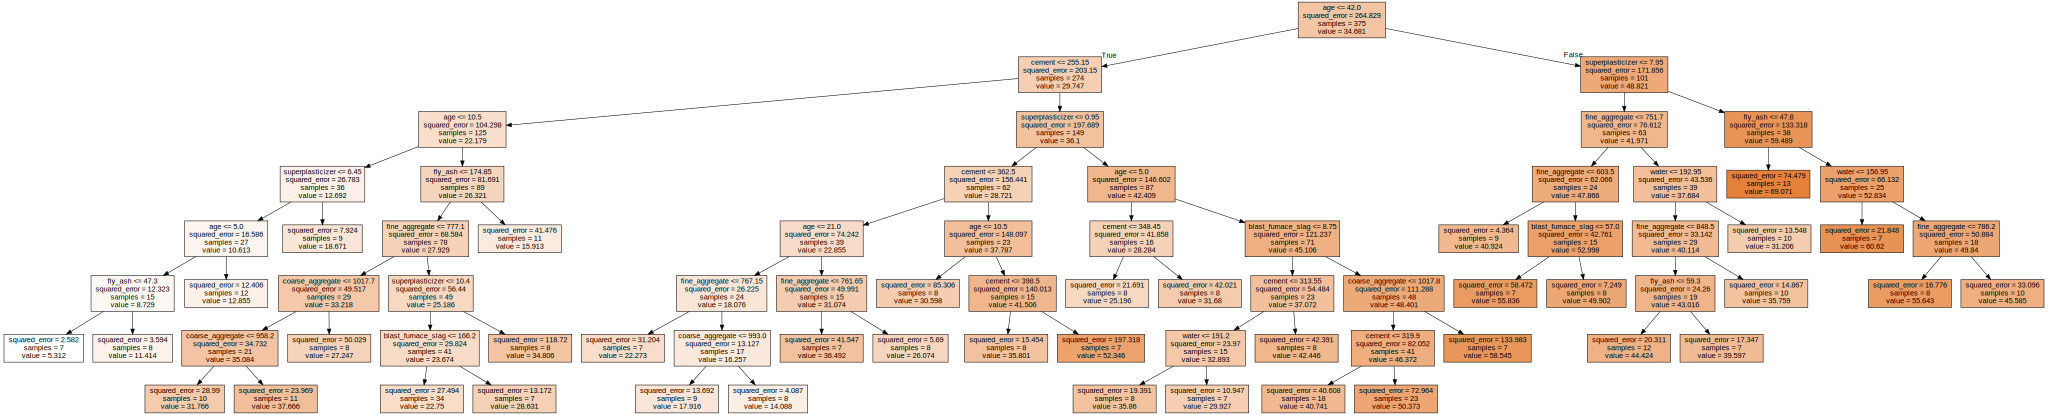

In [44]:
# 1번 트리 시각화
export_graphviz(rf_final.estimators_[1], out_file = "rfr_final_1.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_1.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

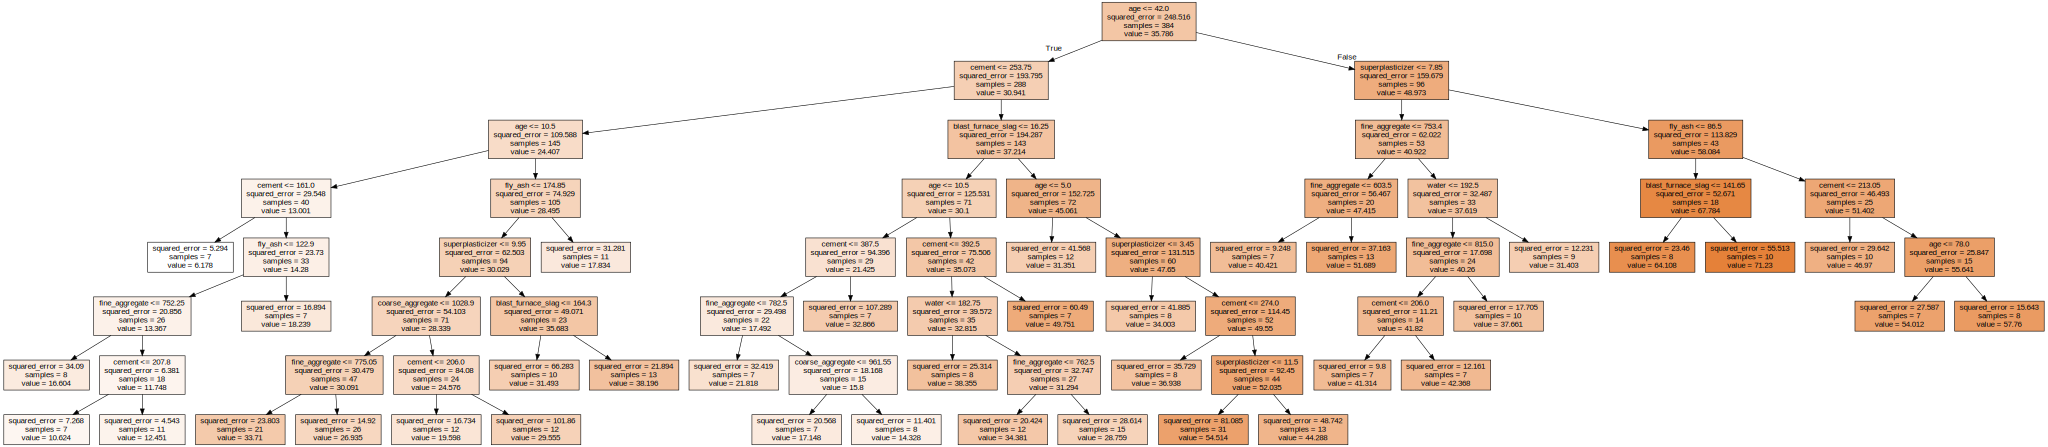

In [45]:
# 10번 트리 시각화
export_graphviz(rf_final.estimators_[10], out_file = "rfr_final_10.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_10.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### 설명변수의 중요도

- 0.1이 넘는 것들을 중요 설명변수로 생각하였으며 age, cement, water 순서대로 영향이 크다고 해석할 수 있다.



In [46]:
# 설명변수 중요도
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.407
0,cement,0.268
3,water,0.103
4,superplasticizer,0.088
1,blast_furnace_slag,0.066
6,fine_aggregate,0.038
2,fly_ash,0.015
5,coarse_aggregate,0.014


Text(0, 0.5, '변수')

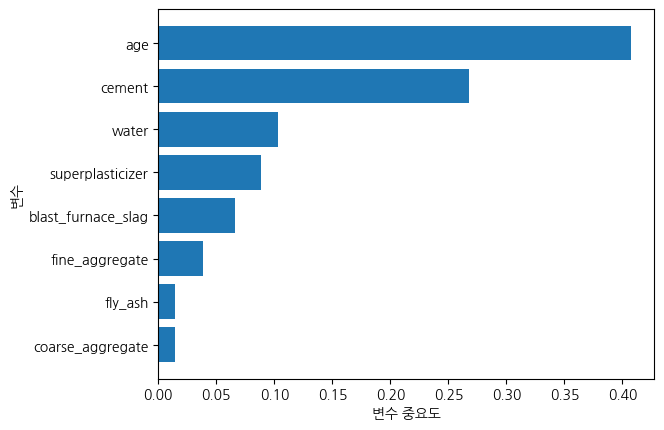

In [47]:
# 설명변수 중요도
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

##### predict method를 이용한 예측값을 구하기

- 실제값이 31.97 이지만 예측값이 37.25981329 으로 실제값과 차이가 어느 정도 나는 것을 확인할 수 있다.

In [48]:
# 전체 예측값
print(rf_final.predict(df_test_x))
print("-------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()

print("---Test y data---")
print(df_test_y.iloc[0])
print()

print("---predicted data---")
print(rf_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[37.25981329 33.50128521 23.14213534 53.73327808 27.1856387  37.39935202
 32.32444069 16.07418731 14.97434924 18.81716218 27.34327583 13.31129541
 43.93517486 34.88441335 36.28020607 26.50780318 55.78392374 42.58758567
 25.69693708 37.26629854 36.72734028 56.31107267 58.89507622 26.31129037
 32.57340038 22.39438412 48.07872143 43.10383361 29.36435575 44.08712453
 53.54153964 42.04453661 15.78981714 54.73073489 49.57411352 32.42587742
 34.00930764 30.30878707 28.08960543 61.90955503 45.61044244 57.21871845
 54.17893514 32.35646891 27.46987733 15.95166999 40.11939488 69.89526395
 22.80106527 45.12622836 43.84767486 19.17577406 16.43817828 13.47564176
 21.23214205 33.60611798 35.26106633 36.81822717 48.6850812  13.63232509
 34.80494646 52.53343509 29.63533739 36.44284717 48.64049354 37.14186621
 48.8405807  63.34690067 34.52398084 15.58785424 55.60694672 54.77368518
 60.03477096 32.45415634 34.43210772 61.48846939 20.87368147 59.3098123
  9.44214338 50.18455895 34.36803281 59.70357164 38.

### 그래디언트 부스팅

##### 데이터 전처리

In [49]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/Concrete.csv", encoding = "euc-kr")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [50]:
# 중복 제거
df_raw = df_raw.drop_duplicates()

In [51]:
# 종속변수에는 strength, 독립변수에는 나머지 변수들을 넣어줌
df_raw_y = df_raw['strength']
df_raw_x = df_raw.drop("strength", axis = 1, inplace = False)

In [52]:
# 훈련 데이터는 60%, 테스트 데이터 40%로 분리
df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(df_raw_x , df_raw_y ,test_size = 0.4 , random_state = 112)
                                                                  
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(603, 8)
train data Y size :(603,)
test data X size :(402, 8)
test data Y size :(402,)


##### 모델 생성

In [53]:
# 기본 모델 생성
gb_uncustomized = GradientBoostingRegressor(random_state = 112)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.951
Score on test set: 0.901


- 기본 옵션으로 만든 모델의 설명력을 보았을때 나쁘지 않은 것을 확인할 수 있으나, 파라미터 조정을 통해 더 좋은 모델을 만들 수도 있으니 조정을 새로운 모델을 만들어 보도록 한다.

##### 트리 수 파라미터 설정

- tree수가 너무 많으면 과대적합 되고, 반대로 너무 적으면 모델 설명력이 떨어진다. train과 test score 차이를 비교했을 때 값이 차이가 적게나고, test score 적절히 높은 값인 60을 선택했다.

In [54]:
# v_n_estimators 트리 수 변경에 따른 모델 성능 

train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 112 , n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [55]:
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.624,0.626
1,20,0.788,0.779
2,30,0.855,0.836
3,40,0.891,0.861
4,50,0.911,0.877
5,60,0.927,0.886
6,70,0.935,0.892
7,80,0.941,0.896
8,90,0.947,0.899
9,100,0.951,0.901


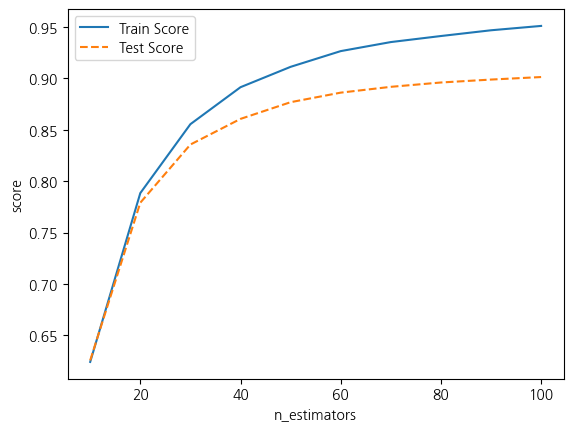

In [56]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

##### 잎사귀 노드의 최소자료 수 파라미터 설정

- min_samples_leaf 가 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. train과 test score 차이를 비교했을 때 값이 차이가 적게나며, 너무 작지도 크지도 않은 최소자료수인 11을 채택한다

In [57]:
# 잎사귀 노드 최소결정개수 

train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 112, n_estimators = 60, 
                                min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [58]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.927,0.886
1,2,0.925,0.887
2,3,0.922,0.886
3,4,0.920,0.884
4,5,0.921,0.884
5,6,0.917,0.885
6,7,0.918,0.885
7,8,0.919,0.885
8,9,0.917,0.886
9,10,0.919,0.888


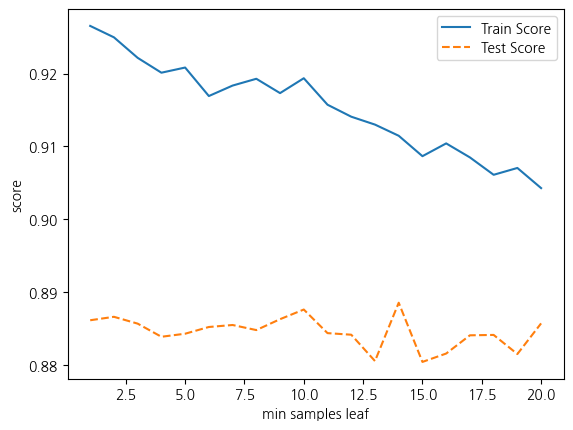

In [59]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

##### split 노드의 최소자료 수 파라미터 설정

- min_samples_split이 너무 작으면 과대적합 되고, 반대로 너무 커지면 모델 설명력이 떨어진다. train과 test score 차이를 비교했을 때, 모든 최소자료수에서 값이 비슷한 것을 확인할 수 있다. 그래서 min_samples_leaf의 두 배인 22으로 설정하였다.


In [60]:
# 스플릿 노드의 최소결정계수 결정
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split :
    gb = GradientBoostingRegressor (random_state = 112, n_estimators = 60, 
                                min_samples_leaf = 11, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.916,0.884
1,4,0.916,0.884
2,6,0.916,0.884
3,8,0.916,0.884
4,10,0.916,0.884
5,12,0.916,0.884
6,14,0.916,0.884
7,16,0.916,0.884
8,18,0.916,0.884
9,20,0.916,0.884


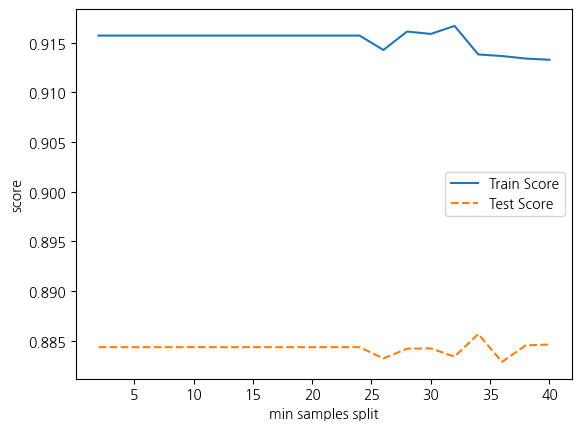

In [61]:
plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

###### max_depth 파라미터 설정

- max_depth 가 커지면 모델의 설명력은 증가하지만, 과대적합될 우려가 있다. train과 test score 차이를 비교했을 때 차이가 적고, test score가 나쁘지 않은 3으로 채택하였다.



In [62]:
# 뎁스 최대 깊이
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb = GradientBoostingRegressor (random_state = 112, n_estimators = 60, 
                                min_samples_leaf = 11, min_samples_split=22 , 
                               max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [63]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.719,0.736
1,2,0.863,0.855
2,3,0.916,0.884
3,4,0.945,0.895
4,5,0.965,0.907
5,6,0.975,0.909
6,7,0.979,0.910
7,8,0.983,0.917
8,9,0.985,0.915
9,10,0.986,0.915


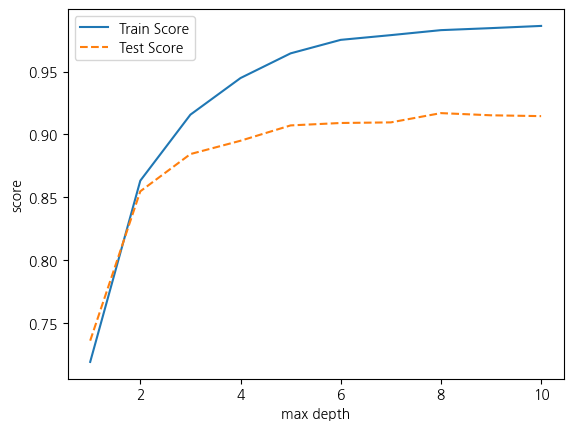

In [64]:
plt.plot(para_depth, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

##### learning_rate 학습률 변경에 따른 모델 성능

- learning_rate가 높으면 과적합의 우려가 있기 때문에 너무 큰 값이 아니고, Train Score와 Test Score가 차이가 적은 0.5로 설정한다.

In [65]:
# learning_rate 학습률 변경에 따른 모델 성능
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 112, n_estimators = 60, min_samples_leaf = 11 ,
                                  min_samples_split = 22, max_depth = 3 , learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

In [66]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.916,0.884
1,0.2,0.949,0.907
2,0.3,0.958,0.906
3,0.4,0.971,0.907
4,0.5,0.973,0.906
5,0.6,0.974,0.898
6,0.7,0.978,0.896
7,0.8,0.969,0.881
8,0.9,0.977,0.873


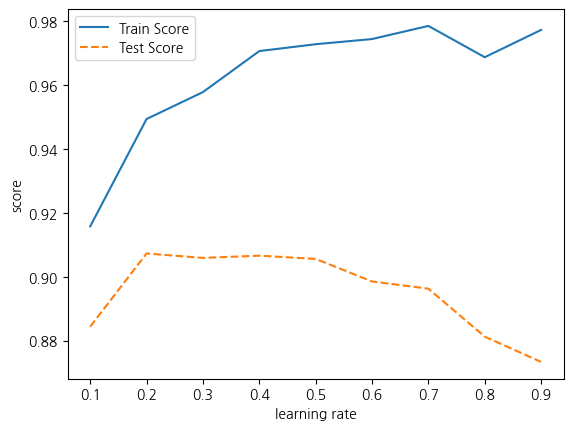

In [67]:
plt.plot(para_lr, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

##### 최종 모델 선정

- 최종적으로 잎사귀 노드의 tree 개수는 60개, 최소자료수는 11, 스플릿 노드의 최소자료수는 22, 최대 깊이는 3, learning_rate = 0.5로 파라미터를 설정하여 모델을 만들었다.


In [91]:
# 최종 모델 생성
gb_final = GradientBoostingRegressor (random_state = 112, n_estimators = 60, 
                                min_samples_leaf = 11, min_samples_split=22 , 
                               max_depth = 3 , learning_rate = 0.5)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.973
Score on test set:0.906


##### 설명변수의 중요도

- 0.1이 넘는 것들을 중요 설명변수로 생각하였으며 age, cement, superplasticizer 순서대로 영향이 크다고 해석할 수 있다.



In [69]:
# feature_importances 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.407
0,cement,0.244
4,superplasticizer,0.103
3,water,0.095
1,blast_furnace_slag,0.072
6,fine_aggregate,0.055
5,coarse_aggregate,0.015
2,fly_ash,0.009


Text(0, 0.5, '변수')

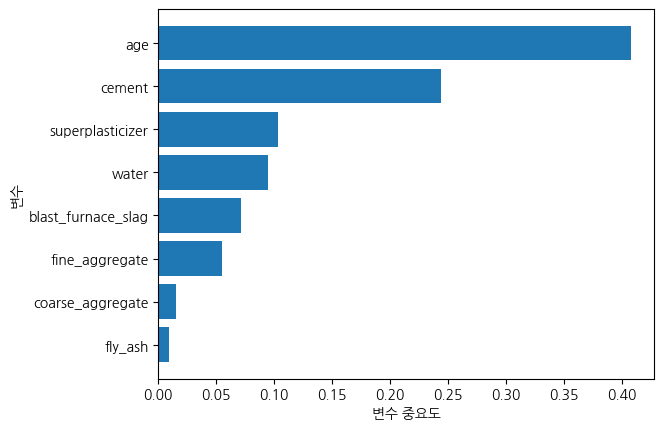

In [70]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

###### predict method를 이용한 예측값을 구하기

- 실제값은 31.97이지만 예측값이 33.88 으로 오차가 적은 것을 확인할 수 있다.

In [71]:
# 전체 예측값
print(gb_final.predict(df_test_x))
print("-------------------------------------")
print()

print("---Test x data---")
print(df_test_x.iloc[0])
print()

print("---Test y data---")
print(df_test_y.iloc[0])
print()

print("---predicted data---")
print(gb_final.predict(pd.DataFrame(df_test_x.iloc[0,:]).T))

[33.88263662 25.27838315 22.45138827 61.53664289 28.158164   34.61784867
 43.20719964 19.84493612 15.70723737 13.05946796 27.31263058 16.59169937
 41.34709336 30.81550666 36.94333431 23.94360409 52.43218441 49.05037419
 25.3257073  35.87119634 34.99099865 53.07824364 60.98353328 22.19435456
 29.09758663 26.06711642 48.71259921 44.9028153  18.69225867 39.25998407
 57.25279771 39.9560846  18.31589444 52.78977315 44.10588949 27.38581942
 50.34644665 32.11556654 23.69368827 77.98339033 43.71837475 56.63003825
 46.93315943 28.81670866 25.69362424 16.5898486  40.15481147 82.64122234
 19.9427968  47.1048387  40.0750724  16.22180778 14.28074034  7.04787077
 19.66702792 33.89345578 32.12261863 34.59716421 54.09531702  7.00817027
 32.04691473 61.50184817 23.68202081 25.67072543 38.90850005 32.12332459
 50.007087   70.59749191 34.1257967  13.65545476 48.83632239 55.12704291
 65.48424504 31.18600536 32.64114144 63.21967103 18.50215279 60.06520425
 16.93563744 51.47966387 26.14574935 53.67560371 40

### 결론

###### 3개의 방법을 비교해본 결과 모델 설명력은 다음과 같다.
- 의사결정트리의 test set 모델 설명력은 0.632
- 랜덤포레스트의 test set 모델 설명력은 0.864
- 그래디언트 부스팅의 test set 모델 설명력은 0.906

모델 설명력으로 비교해보았을 때는 그래디언트 부스팅, 랜덤포레스트, 의사결정트리 순서대로 모델의 성능이 좋은 것을 확인할 수 있었다. 일반적으로 자연과학/공학계열에서 70% 이상이면 예측에 활용할 수 있기 때문에, 그래디언트 부스팅과 랜덤포레스트는 예측에 활용할 수 있을 것으로 판단된다. 


###### 각각의 방법으로 콘크리트 강도를 예측한 결과 다음과 같다.
- 의사결정트리 : 42.1
- 랜덤포레스트의 : 37.2
- 그래디언트 부스팅 : 33.8
실제값은 31.97으로 그래디언트 부스팅의 방법이 가장 정확한 것을 확인할 수 있고, 이 모델을 통해서 예측에 활용해볼 수 있다.
